In [2]:
# Importing relevant python pac

import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
import warnings 
warnings.filterwarnings('ignore')
np.random.seed(42)

print("All packages imported!")

plt.style.use('bmh')
sns.set_style(style="whitegrid")

All packages imported!


In [3]:
# Reading air_reserve and air_store_info csv file into a datagrame

air_reserve = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'air_reserve.csv'))
air_store_info = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'air_store_info.csv'))

# Converting the reserve_datetime and visit_datetime fields 
# from string objects to datetime fields

air_reserve['reserve_datetime'] = pd.to_datetime(air_reserve['reserve_datetime'])
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'])

# Calculating the difference in time between the reserve date and the visit date 
# for each row

time_difference = air_reserve['visit_datetime'] - air_reserve['reserve_datetime']

# Creating a new columnb for the time difference

air_reserve['time_difference'] = time_difference

# merging the air_reservation data with the store info data

air_info_merged = pd.merge(air_reserve, air_store_info, on='air_store_id')

Text(0.5, 1.0, 'Number of days reserved in advance for each category')

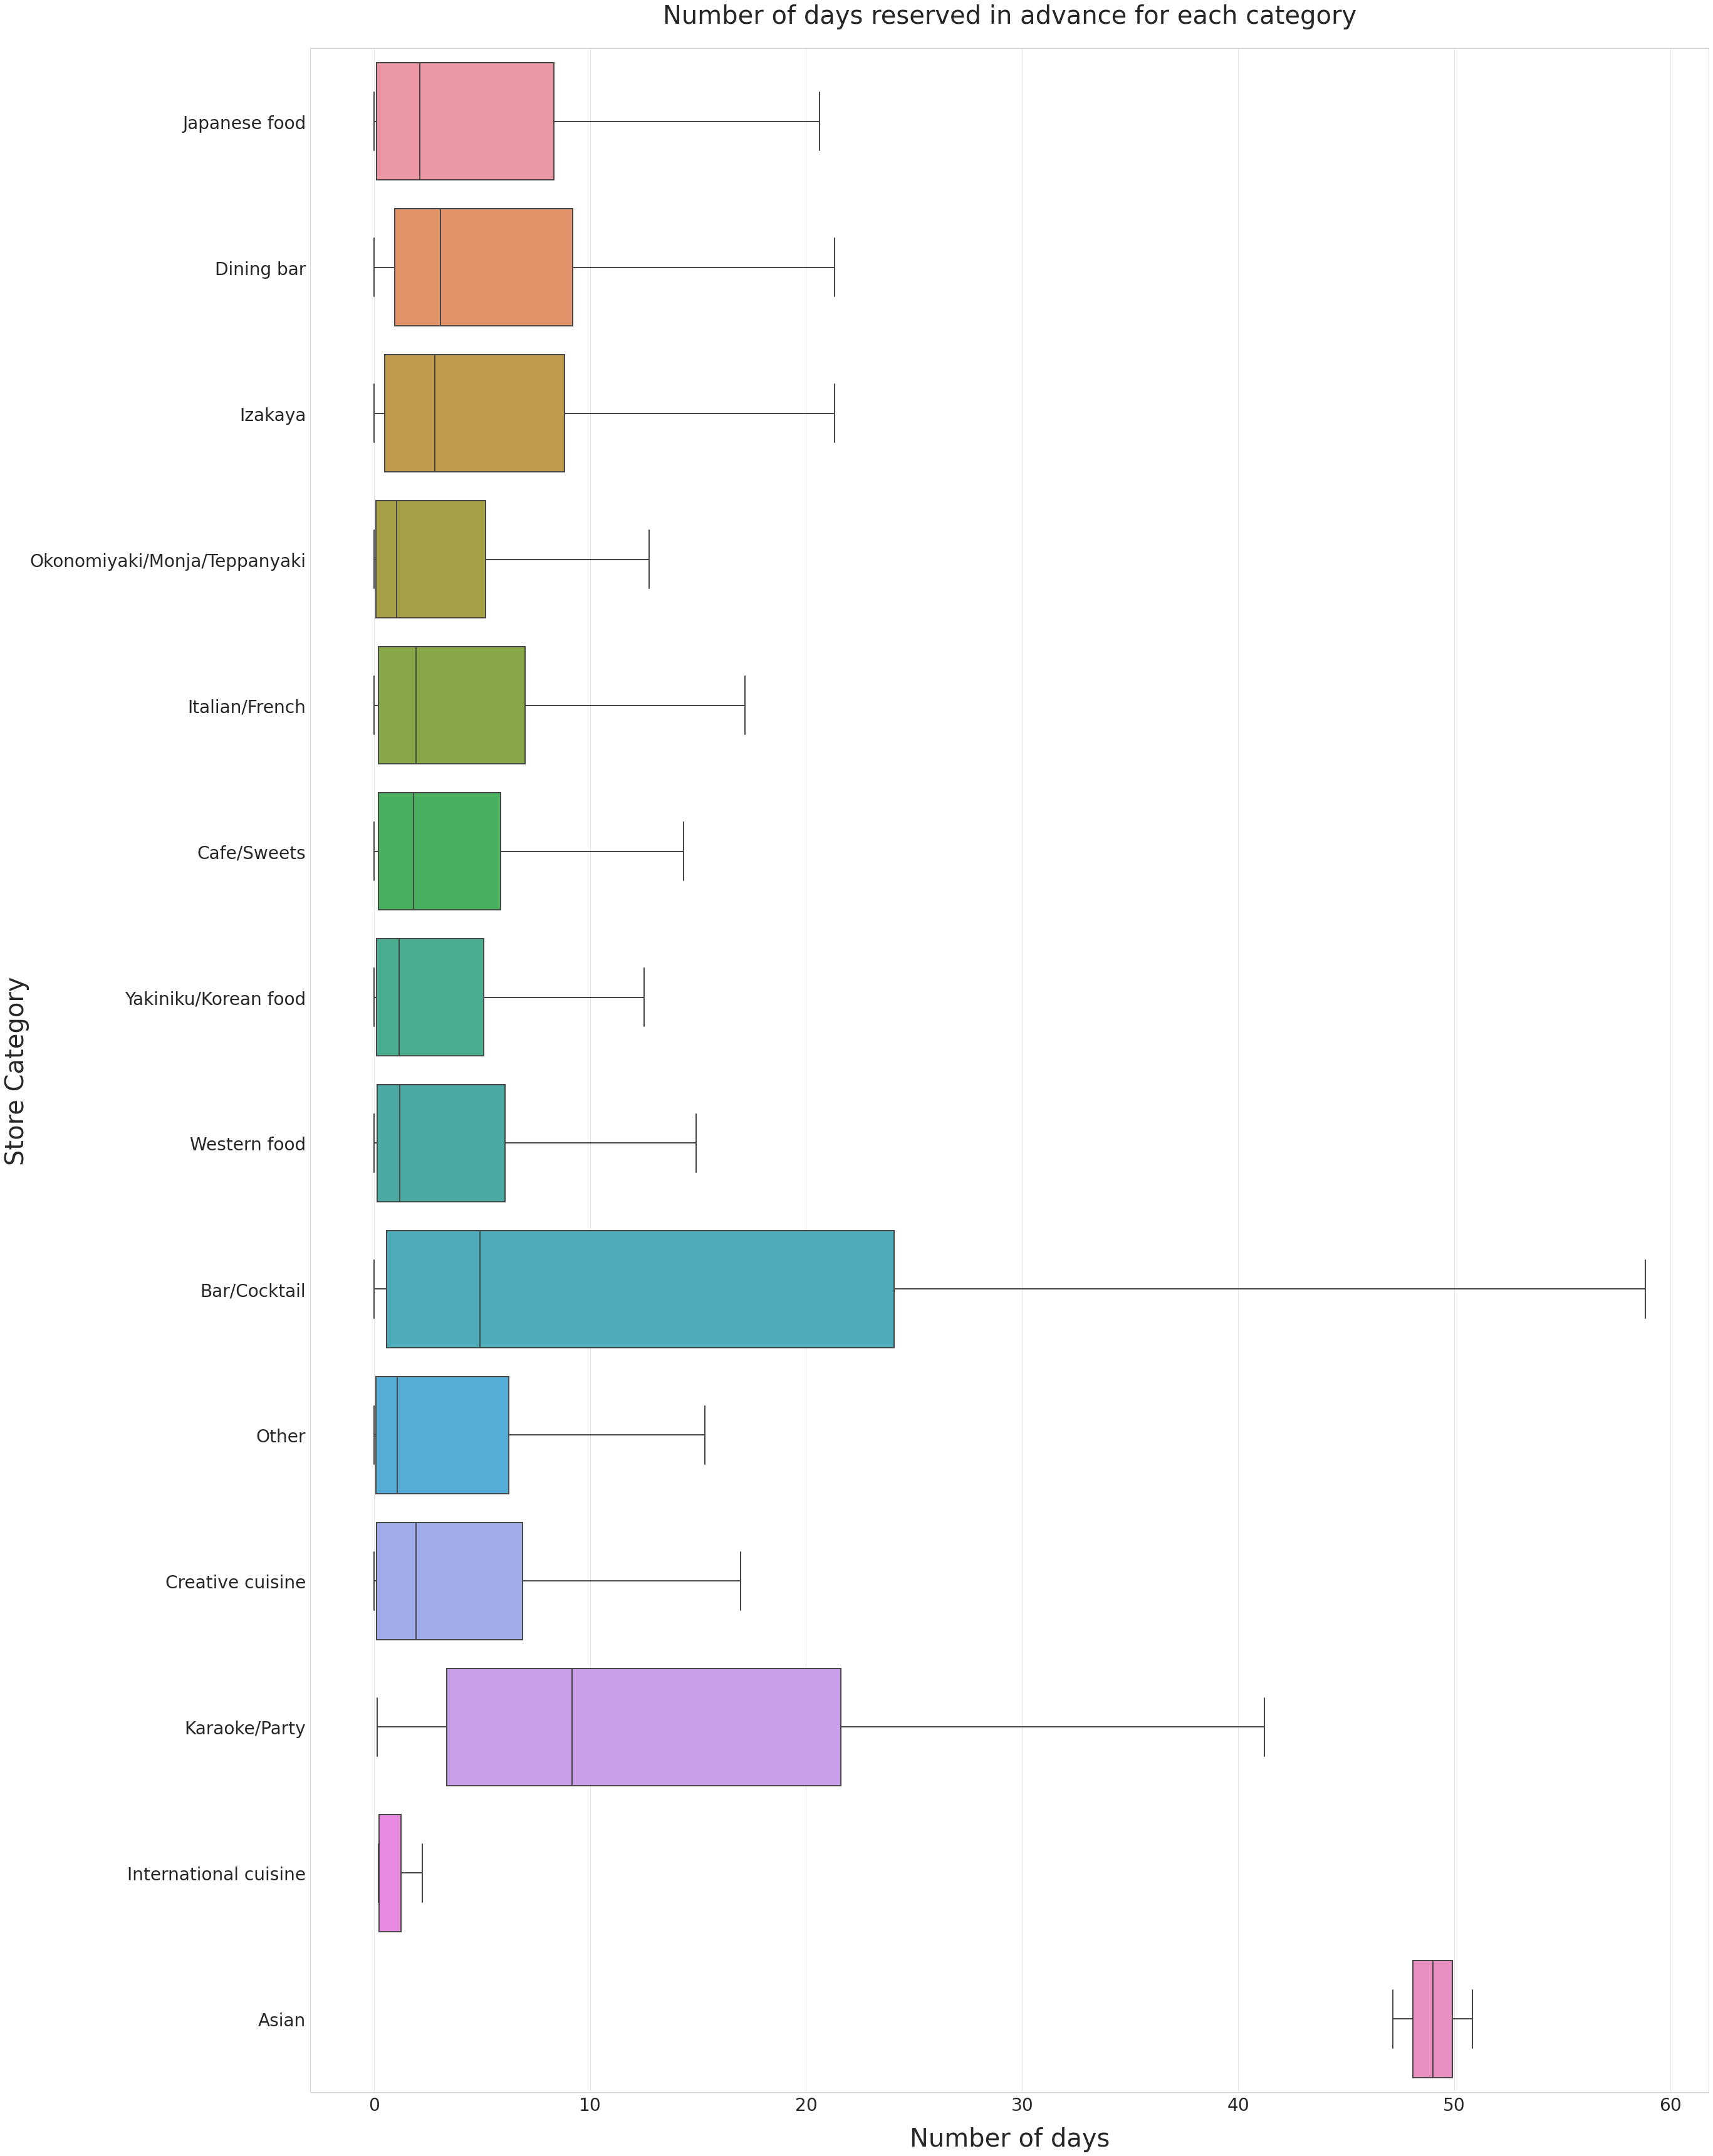

In [4]:
# Plotting the data

fig = plt.figure(figsize = (40,60))
axes = fig.add_subplot(111)

# Using seaborn to plot the boxplot. Note that I have converted the time_difference datetime into 
# the number of days booked in advance by converting the column into an array, finding the total seconds in 
# that datetime and using arithmetic to get the days from seconds

sns.boxplot(x = (air_info_merged['time_difference'].array.total_seconds()/(3600*24)), y = "air_genre_name", data = air_info_merged,showfliers = False)

# Setting up the labels and fontsize of the the x and y axis labels 

axes.set_xlabel('Number of days',fontsize = 40 ,labelpad = 20)
axes.set_ylabel('Store Category',fontsize = 40 ,labelpad = 0)

# Changing the fontsize of the x and y ticklabels 

axes.tick_params(axis='x', labelsize = 28)
axes.tick_params(axis='y', labelsize = 28)

# Setting up the title and fontsize of the the x and y axis labels 

axes.set_title(label='Number of days reserved in advance for each category',
              pad = 40, fontsize = 40)


I have chosen to plot every category as although it leads to a busier boxplot, the categories from task 3 are extremely vague, and through common sense it seemed that from those categories, Asian would be most popular, so I chose to get a boxplot for each of the original categories. It is clear that on average, the asian cuisine is still the most popular. Interestingly however, this excludes Japanese food and Korean food, which implies other asian cuisines (perhaps Chinese or Malaysian) are more popular, if we are basing popularity on the reservation and visit date time difference. Bar and cocktail reservations vary hugely, and you can see that bars and cocktails have been booked the earliest out of all of the genres. Karaoke/Party values follow a similar but less extreme trend, and Izayaka and dining bars are about the same. The least popular seems to be international cuisine restaurants, which is likely because mainly tourists visit these restaurants.